In [157]:
import numpy as np
import pandas as pd
import PIL.Image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import model_from_json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [158]:
model = Sequential() 
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu')) #3 is for type of image
model.add(MaxPooling2D(pool_size = (2, 2))) 

model.add(Conv2D(64, (3, 3), activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3), activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

In [159]:
model.add(Dense(units = 64, activation = 'relu')) 
model.add(Dense(units = 10, activation = 'softmax')) 

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [160]:
data_train = ImageDataGenerator(rescale = 1./255, rotation_range = 7, horizontal_flip = True,shear_range=0.2,height_shift_range=0.07,zoom_range=0.2) 
data_test = ImageDataGenerator(rescale = 1./255)

In [161]:
base_train = data_train.flow_from_directory(r'C:\Users\pmrud\Desktop\train',
                                            target_size = (64, 64),
                                            batch_size = 30,
                                            class_mode = 'categorical') 

base_test = data_test.flow_from_directory(r'C:\Users\pmrud\Desktop\test',
                                          target_size = (64, 64),
                                          batch_size = 30,
                                          class_mode = 'categorical')

Found 8736 images belonging to 10 classes.
Found 677 images belonging to 10 classes.


In [162]:
model.fit_generator(base_train, steps_per_epoch = 30,epochs = 13,validation_data = base_test,validation_steps = 3)

Epoch 1/13
30/30 [==============================] - 10s 350ms/step - loss: 2.0802 - acc: 0.2211 - val_loss: 2.2269 - val_acc: 0.1000
Epoch 2/13
30/30 [==============================] - 9s 309ms/step - loss: 1.8047 - acc: 0.3344 - val_loss: 2.2847 - val_acc: 0.1444
Epoch 3/13
30/30 [==============================] - 10s 331ms/step - loss: 1.6609 - acc: 0.4167 - val_loss: 2.1603 - val_acc: 0.1667
Epoch 4/13
30/30 [==============================] - 11s 360ms/step - loss: 1.5389 - acc: 0.4444 - val_loss: 1.7817 - val_acc: 0.4333
Epoch 5/13
30/30 [==============================] - 11s 377ms/step - loss: 1.3782 - acc: 0.5411 - val_loss: 1.7421 - val_acc: 0.3556
Epoch 6/13
30/30 [==============================] - 12s 399ms/step - loss: 1.4766 - acc: 0.5089 - val_loss: 1.7048 - val_acc: 0.3222
Epoch 7/13
30/30 [==============================] - 11s 382ms/step - loss: 1.3117 - acc: 0.5500 - val_loss: 2.0452 - val_acc: 0.3111
Epoch 8/13
30/30 [==============================] - 11s 365ms/step - l

In [163]:
result = []

test_image = image.load_img(r"C:\Users\pmrud\Desktop\test\homer_simpson\pic_0016.jpg", target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

pred = model.predict_on_batch(test_image)
result.append(pred)

result = np.asarray(result)
imprime = np.array(result[0][0])
print(imprime)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [164]:
model_json=model.to_json()

In [165]:
with open('model_json.json', 'w') as json_file:
    json_file.write(model_json)

In [166]:
model.save_weights('model_simpsons.h5')

In [167]:
ar= open('model_json.json', 'r')
struct = ar.read()
ar.close()

In [168]:
model = model_from_json(struct)
model.load_weights('model_simpsons.h5')
result = []

In [169]:
person = pd.read_csv('number_pic_char.csv', index_col = 0)
person.sort_values(by=['name'], inplace=True)
person.drop(['total', 'train', 'test', 'bounding_box',], axis = 1, inplace=True)
person.reset_index(drop = True, inplace=True)
person

,name
0,Abraham Grampa Simpson
1,Agnes Skinner
2,Apu Nahasapeemapetilon
3,Barney Gumble
4,Bart Simpson
5,Bumblebee Man
6,Carl Carlson
7,Charles Montgomery Burns
8,Chief Wiggum
9,Cletus Spuckler


In [170]:
person.drop([2,5,6,7,8, 9, 11, 12, 13, 14,15, 16, 17, 19, 20,21,22,23, 24,26,28,31,32 ,34,35,36,37,38, 39,40,41,42 ,43, 44, 45,46], inplace=True)
person.reset_index(drop = True, inplace=True)
person.head(10)

,name
0,Abraham Grampa Simpson
1,Agnes Skinner
2,Barney Gumble
3,Bart Simpson
4,Comic Book Guy
5,Homer Simpson
6,Lisa Simpson
7,Marge Simpson
8,Mayor Quimby
9,Milhouse Van Houten


In [174]:
imagem=r"C:\Users\pmrud\Desktop\test\lisa_simpson\pic_0038.jpg"

In [175]:
result = []

test_image = image.load_img(imagem, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

pred = model.predict_on_batch(test_image)
result.append(pred)

result = np.asarray(result)
imprime = np.array(result[0][0])
imprime

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

The predicted character Lisa Simpson


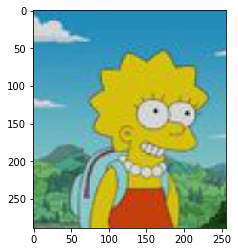

In [177]:
result_final  = imprime.argmax()
imagem = r"C:\Users\pmrud\Desktop\test\lisa_simpson\pic_0038.jpg"
imagem = mpimg.imread(imagem)
plt.imshow(imagem)
print('The predicted character '+person.loc[result_final][0])